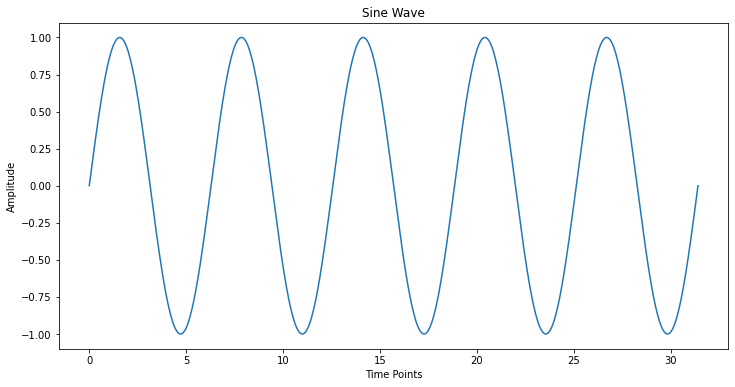

In [36]:
import numpy as np
import matplotlib.pyplot as plt

time_points = np.linspace(0, 10 * np.pi, 1000)  # 10 cycles of a sine wave
sine_wave = np.sin(time_points)
plt.figure(figsize=(12,6))
plt.plot(time_points, sine_wave)
plt.xlabel("Time Points")
plt.ylabel("Amplitude")
plt.title("Sine Wave")
plt.show()

In [16]:
def generate_sequences(sequence, seq_length):
    X, y = [], []
    
    for i in range(len(sequence) - seq_length):
        X.append(sequence[i:i+seq_length])
        y.append(sequence[i+seq_length])
        
    return np.array(X), np.array(y)

seq_length = 15
X, y = generate_sequences(sine_wave, seq_length)


In [17]:
# Split the dataset
train_size = int(0.8 * len(X))

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape for RNN input
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [18]:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid = train_test_split(X_train, y_train, test_size=0.2, shuffle=True)

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

model = Sequential()
model.add(SimpleRNN(10, activation='relu', input_shape=(seq_length, 1), unroll=True))
model.add(Dense(1))

In [35]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_7 (SimpleRNN)    (None, 10)                120       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='mse')

# Train on the training set
model.fit(X_train, y_train, epochs=100, verbose=1, validation_data=(X_valid,y_valid))

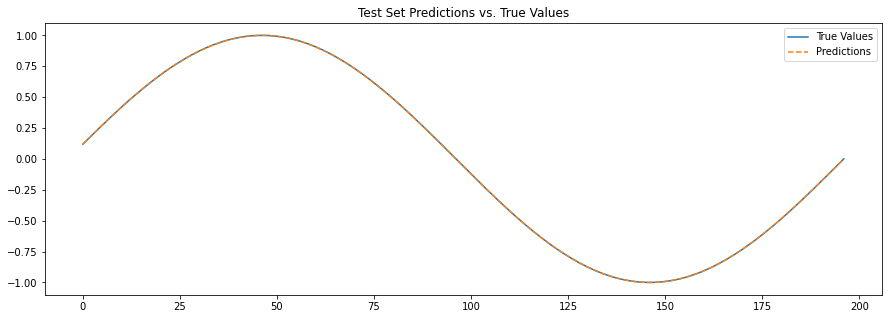

Test MSE: 3.2648660626499704e-07


In [31]:
# Prediction
y_pred = model.predict(X_test)

plt.figure(figsize=(15, 5))
plt.plot(y_test, label='True Values')
plt.plot(y_pred, label='Predictions', linestyle='dashed')
plt.legend()
plt.title("Test Set Predictions vs. True Values")
plt.show()

# If you want to compute the Mean Squared Error (MSE) on the test set:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {mse}")

